Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Reading Data

In [3]:
df= pd.read_csv("Bengaluru_House_Data.csv")
dfc = df.copy()

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [11]:
df.groupby("area_type")["area_type"].agg("count").sort_values(ascending=False)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [12]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
df.duplicated().sum()

529

In [14]:
df.drop_duplicates(keep="last",inplace=True)

In [15]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [16]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df.dropna(inplace=True)

In [18]:
df["bhk"]=df["size"].apply(lambda x: int(x.split(" ")[0]))
df.drop(["size","availability","society"], axis =1 , inplace=True)
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2
11,Plot Area,Whitefield,2785,5.0,3.0,295.00,4


In [19]:
df.bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [20]:
df[df.bhk>5]

,area_type,location,total_sqft,bath,balcony,price,bhk
459,Super built-up Area,1 Giri Nagar,5000,9.0,3.0,360.0,11
538,Super built-up Area,Mico Layout,5000,9.0,3.0,210.0,9
2252,Super built-up Area,Uttarahalli,3600,6.0,2.0,120.0,6
2620,Super built-up Area,Sathya Sai Layout,11338,9.0,1.0,1000.0,6
2739,Super built-up Area,Giri Nagar,4500,5.0,3.0,250.0,7
4738,Plot Area,Bannerghatta Road,1850,6.0,3.0,150.0,6
6028,Built-up Area,Banashankari,1200,6.0,2.0,180.0,6
10180,Plot Area,KR Puram,1200,6.0,3.0,132.0,6
12750,Plot Area,Whitefield,4000,5.0,1.0,540.0,6


In [21]:
df.total_sqft.value_counts()

total_sqft
1200               168
1100               100
1000                75
1500                72
1300                68
                  ... 
628                  1
547.34 - 827.31      1
2465                 1
4075                 1
4689                 1
Name: count, Length: 1682, dtype: int64

In [24]:
print(df["total_sqft"])

0        1056
1        2600
3        1521
5        1170
11       2785
         ... 
13313    1345
13314    1715
13315    3453
13317    1141
13318    4689
Name: total_sqft, Length: 7144, dtype: object


In [22]:
# creating a function to subset ranges values in total square foot column
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df2 = df[-df["total_sqft"].apply(is_float)]

In [25]:
df2.total_sqft.unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '1195 - 1440', '1120 - 1145', '3090 - 5002',
       '1160 - 1195', '1115 - 1130', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '1445 - 1455', '884 - 1116',
       '850 - 1093', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '1076 - 1199', '381 - 535', '524 - 894', '540 - 670',
       '2725 - 3250', '888 - 1290', '660 - 700', '385 - 440', '770 - 841',
       '188.89Sq. Yards', '1469 - 1766', '204Sq. Meter',

In [26]:
# function of getting the average of the ranges
def convert_column_to_avg(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
df["total_sqft"] = df["total_sqft"].apply(convert_column_to_avg)

In [28]:
df["total_sqft"]

0        1056.0
1        2600.0
3        1521.0
5        1170.0
11       2785.0
          ...  
13313    1345.0
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
Name: total_sqft, Length: 7144, dtype: float64

In [29]:

df.dropna(inplace = True)

df.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [30]:
dfc.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [31]:
dfc.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [32]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [33]:

dfc.balcony.value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7129 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   7129 non-null   object 
 1   location    7129 non-null   object 
 2   total_sqft  7129 non-null   float64
 3   bath        7129 non-null   float64
 4   balcony     7129 non-null   float64
 5   price       7129 non-null   float64
 6   bhk         7129 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 445.6+ KB


In [35]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,2785.0,5.0,3.0,295.00,4


In [36]:
df1=df.copy()

In [37]:
df1["price_sqft"] = df1["price"]*100000/df1["total_sqft"]

df1.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605


In [38]:
df["location"] = df["location"].apply(lambda x: x.strip())

df_value = df["location"].value_counts()

df_value

location
Whitefield            382
Sarjapur  Road        297
Electronic City       231
Thanisandra           209
Kanakpura Road        195
                     ... 
Raghavendra Nagar       1
Bhuvaneswari Nagar      1
Immadihalli             1
Jai Bheema Nagar        1
VHBCS Layout            1
Name: count, Length: 625, dtype: int64

In [39]:
df_value[df_value <= 10].count()

486

In [40]:
location_less_than_ten = df_value[df_value <= 10]

location_less_than_ten

location
Rayasandra            10
Prithvi Layout        10
Mallasandra           10
Dairy Circle          10
Pattandur Agrahara    10
                      ..
Raghavendra Nagar      1
Bhuvaneswari Nagar     1
Immadihalli            1
Jai Bheema Nagar       1
VHBCS Layout           1
Name: count, Length: 486, dtype: int64

In [46]:
df1["location"] = df1["location"].apply(lambda x: "others" if x in location_less_than_ten else x)

In [47]:
df1.location.nunique()

148

In [48]:
df1.nunique()

area_type        4
location       148
total_sqft    1623
bath             8
balcony          4
price         1515
bhk              9
price_sqft    5250
dtype: int64

In [49]:
df1.shape

(7129, 8)

In [50]:
df2=df1.copy()

In [51]:
df2.sample(7)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
12396,Super built-up Area,Electronics City Phase 1,1205.00,2.0,2.0,60.00,2,4979.253112
3875,Super built-up Area,Kengeri Satellite Town,1149.00,2.0,2.0,29.00,3,2523.933856
2016,Super built-up Area,Bommasandra,1034.00,2.0,3.0,40.00,2,3868.471954
1119,Super built-up Area,Electronic City,1265.00,2.0,0.0,56.93,2,4500.395257
3012,Super built-up Area,Kanakpura Road,1419.59,2.0,1.0,59.00,3,4156.129587
7903,Super built-up Area,Kaggadasapura,1000.00,2.0,2.0,43.00,2,4300.000000
6644,Super built-up Area,Sarjapur Road,1489.00,2.0,3.0,82.00,3,5507.051713


In [52]:
# finding houses that goes below the typical standard normal of 300 per square feet
outlier_1 = df2[df2.total_sqft/df2.bhk<300]

outlier_1.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
349,Plot Area,others,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,others,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,others,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Electronic City,550.0,1.0,1.0,16.0,2,2909.090909
2126,Super built-up Area,Electronic City Phase II,545.0,1.0,1.0,27.0,2,4954.128440


In [53]:
# removing the above outliers from the main data
df3 =  df2[-(df2.total_sqft/df2.bhk<300)]

df3.shape

(7089, 8)

In [54]:
df3.price_sqft.describe()

count     7089.000000
mean      5886.037797
std       2738.814973
min        371.428571
25%       4307.692308
50%       5349.579832
75%       6713.554987
max      76530.612245
Name: price_sqft, dtype: float64

In [55]:
def outlier_remover(df):
    df_out = pd.DataFrame()
    for key, subg in df3.groupby("location"):
        m = np.mean(subg.price_sqft)
        s_d = np.std(subg.price_sqft)
        reduced_df = subg[(subg.price_sqft > (m + s_d)) | (subg.price_sqft < (m - s_d))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df4 = outlier_remover(df3)

df4.sample(8)


,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
236,Super built-up Area,Chandapura,922.00,2.0,1.0,36.0,2,3904.555315
246,Plot Area,Choodasandra,3200.00,4.0,2.0,375.0,4,11718.750000
51,Built-up Area,9th Phase JP Nagar,600.00,1.0,0.0,20.0,1,3333.333333
167,Super built-up Area,Bharathi Nagar,1379.00,2.0,1.0,85.0,2,6163.886875
917,Super built-up Area,Munnekollal,1200.00,2.0,2.0,49.5,2,4125.000000
715,Super built-up Area,Kanakpura Road,1419.59,2.0,1.0,59.0,3,4156.129587
1332,Plot Area,Whitefield,5700.00,5.0,3.0,650.0,4,11403.508772
884,Super built-up Area,Marathahalli,1937.00,3.0,2.0,160.0,3,8260.196180


In [56]:
df4.shape

(1569, 8)

In [57]:
df4.location.value_counts()[:15]

location
others                      169
Sarjapur  Road               68
Thanisandra                  66
Raja Rajeshwari Nagar        60
Kanakpura Road               56
Hebbal                       42
Marathahalli                 36
Whitefield                   36
Electronic City Phase II     31
Rajaji Nagar                 31
7th Phase JP Nagar           30
Hoodi                        29
Uttarahalli                  21
Old Madras Road              20
Haralur Road                 20
Name: count, dtype: int64

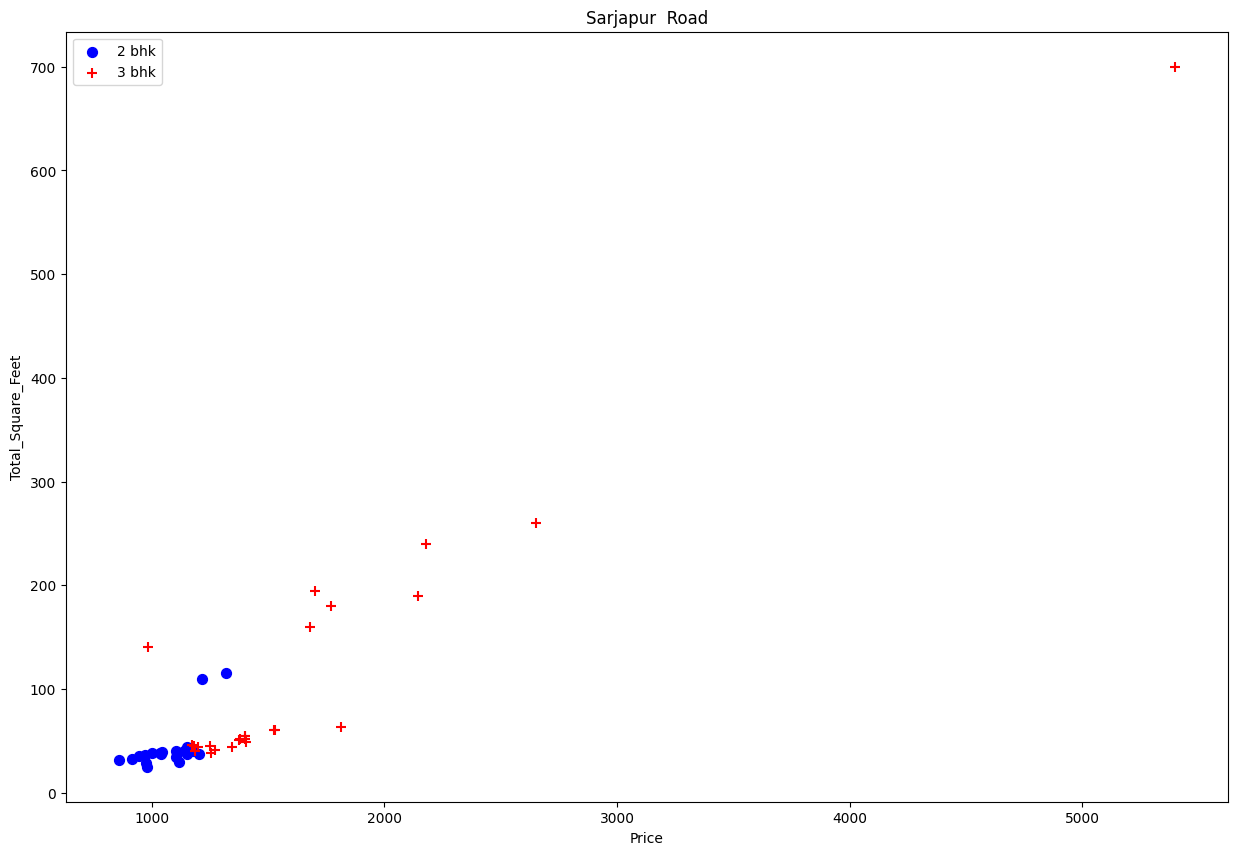

In [58]:
def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 bhk", s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = "red", marker = "+", label = "3 bhk", s = 50)
    plt.xlabel("Price")
    plt.ylabel("Total_Square_Feet")
    plt.title(location)
    plt.legend()
plot_scatter(df4, "Sarjapur  Road")

In [59]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stat = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stat[bhk] = {
                "mean": np.mean(bhk_df.price_sqft),
                "std": np.std(bhk_df.price_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stat.get(bhk - 1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft < stats["mean"]].index.values)
    return df.drop(exclude_indices, axis="index")

df5 =remove_bhk_outlier(df4)

df5.shape

(1360, 8)

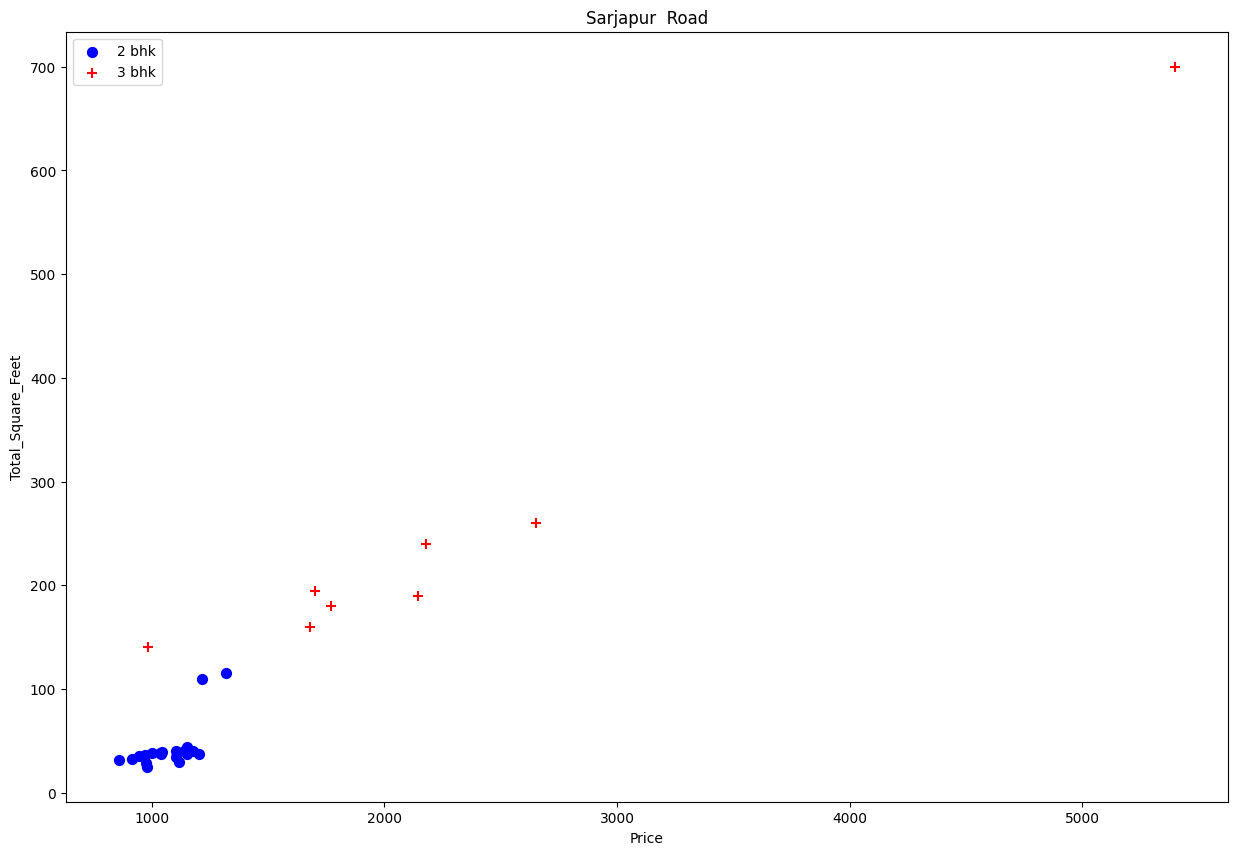

In [60]:
plot_scatter(df5, "Sarjapur  Road")


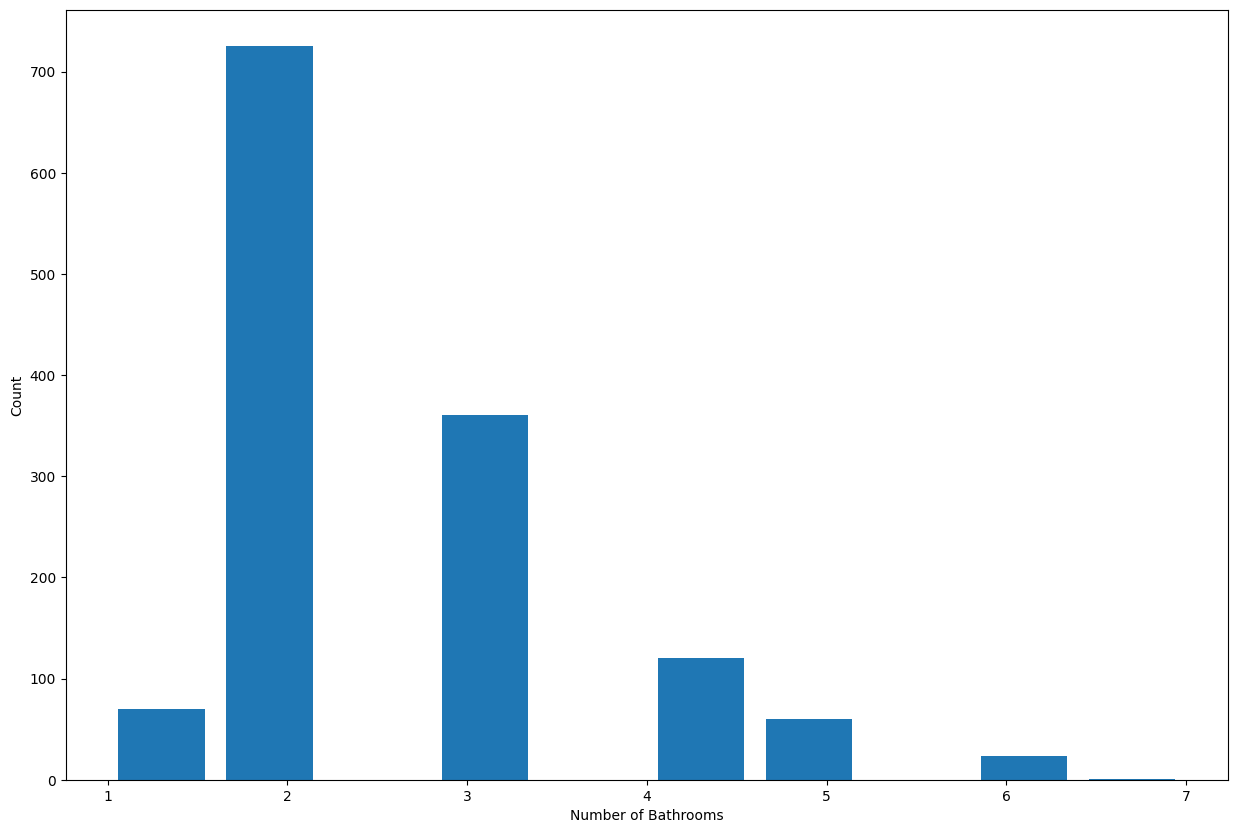

In [61]:
plt.hist(df5.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [62]:
df5[(df5.bath) > (df5.bhk + 2)].shape

(0, 8)

In [63]:
df5.shape

(1360, 8)

In [65]:
df5.nunique()

area_type        4
location       143
total_sqft     694
bath             7
balcony          4
price          515
bhk              6
price_sqft    1191
dtype: int64

In [66]:
df5.sample(20)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
803,Super built-up Area,Koramangala,1120.0,2.0,0.0,65.00,2,5803.571429
1027,Built-up Area,Raja Rajeshwari Nagar,1140.0,2.0,2.0,38.65,2,3390.350877
63,Super built-up Area,Akshaya Nagar,2061.0,3.0,1.0,200.00,3,9704.027171
792,Super built-up Area,Kengeri Satellite Town,1191.0,2.0,2.0,33.34,3,2799.328296
171,Carpet Area,Bhoganhalli,1053.4,3.0,1.0,88.91,3,8440.288589
416,Super built-up Area,Hebbal,1500.0,3.0,1.0,150.00,3,10000.000000
944,Super built-up Area,Old Airport Road,1655.0,2.0,1.0,97.65,2,5900.302115
639,Built-up Area,KR Puram,1115.0,2.0,2.0,33.45,2,3000.000000
356,Super built-up Area,Green Glen Layout,1050.0,2.0,2.0,48.00,2,4571.428571
347,Built-up Area,Gollarapalya Hosahalli,996.0,2.0,2.0,36.50,2,3664.658635


In [67]:
df6=df5.copy()

In [68]:
df6.drop(["area_type", "price_sqft"], axis = 1, inplace = True)

In [69]:
df6.sample(10)

,location,total_sqft,bath,balcony,price,bhk
388,Haralur Road,1464.0,2.0,2.0,56.00,2
190,Bisuvanahalli,1075.0,2.0,1.0,90.00,3
307,Electronic City Phase II,1253.0,2.0,1.0,65.80,2
77,Ambalipura,860.0,2.0,1.0,28.93,2
517,Hoodi,1108.0,2.0,1.0,87.48,2
402,Harlur,1508.0,2.0,1.0,77.00,2
315,Electronic City Phase II,1900.0,3.0,1.0,97.00,4
986,Rachenahalli,2250.0,3.0,1.0,195.00,3
1324,Vijayanagar,1200.0,2.0,2.0,62.00,2
1144,Sarjapur Road,2750.0,5.0,1.0,240.00,4


In [70]:
dummies = pd.get_dummies(df6.location)


In [71]:
dummies.shape

(1360, 143)

In [72]:
dummies.head(5)


,Devarabeesana Halli,Devarachikkanahalli,Thanisandra,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
df7 = pd.concat([df6,dummies.drop("others", axis = "columns")], axis = "columns")

df7.shape

(1360, 148)

In [74]:
df7.sample(14)

,location,total_sqft,bath,balcony,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Thanisandra,1st Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
949,Old Madras Road,2266.0,3.0,2.0,169.00,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
929,Mysore Road,883.0,2.0,1.0,37.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1388,Yelahanka New Town,650.0,1.0,1.0,18.00,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1125,Sarjapur Road,1178.0,2.0,2.0,40.43,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,Hosur Road,760.0,1.0,2.0,21.28,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
617,Jakkur,5150.0,4.0,3.0,559.00,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639,KR Puram,1115.0,2.0,2.0,33.45,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
185,Binny Pete,1350.0,2.0,1.0,91.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
618,Jakkur,1761.0,3.0,1.0,84.52,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1246,Thanisandra,1411.0,3.0,2.0,100.00,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
x = df7.drop(["price", "location"], axis = "columns")

x.head()


,total_sqft,bath,balcony,bhk,Devarabeesana Halli,Devarachikkanahalli,Thanisandra,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1670.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1130.0,2.0,2.0,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,1.0,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,445.0,1.0,0.0,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
y = df7.price
y.head()

0    160.0
1     40.0
2     36.0
3     58.0
4     28.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [78]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8585828268701299

In [79]:
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 10)

cross_val_score(LinearRegression(), x, y, cv = cv)


array([0.78084507, 0.70828697, 0.76365026, 0.81443269, 0.61904457])

In [80]:
kv = KFold(n_splits = 5, shuffle = True, random_state = 42)

cross_val_score(LinearRegression(), x, y, cv = kv)

array([0.85858283, 0.78419727, 0.81413013, 0.58415454, 0.71314956])

In [81]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [Lasso(), DecisionTreeRegressor(), RandomForestRegressor()]
scores = []

for model in models:
    model.fit(x_train, y_train)
    model_score = model.score(x_test, y_test)
    scores.append((model, model_score))

# Sort the scores in descending order
scores.sort(key=lambda x: x[1], reverse=True)

# Print the scores
for model, score in scores:
    print(f"{model.__class__.__name__}: {score}")

Lasso: 0.7930621827467847
RandomForestRegressor: 0.7867813787276282
DecisionTreeRegressor: 0.6153510307179247


In [82]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Thanisandra', '1st Phase JP Nagar',
       '5th Phase JP Nagar', '7th Phase JP Nagar',
       ...
       'Thubarahalli', 'Tumkur Road', 'Uttarahalli', 'Varthur', 'Vijayanagar',
       'Vittasandra', 'Whitefield', 'Yelahanka', 'Yelahanka New Town',
       'Yeshwanthpur'],
      dtype='object', length=146)

In [83]:
def predict_price(location, total_sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    input_features = np.zeros(len(x.columns))
    input_features[0] = total_sqft
    input_features[1] = bath
    input_features[2] = bhk
    if loc_index >= 0:
        input_features[loc_index] = 1

    return lr_clf.predict([input_features])[0]


In [84]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.69931776127349

In [85]:

predict_price('1st Phase JP Nagar', 1000, 2, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.92140187953125

In [86]:
predict_price('Indira Nagar', 1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.89427271493106

In [87]:
predict_price('Indira Nagar', 1149, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.67592137958071

In [88]:
import pandas as pd

# Assuming you have a DataFrame named df
filtered_rows = df[(df['location'] == 'Indira Nagar') & (df['bath'] == 2) & (df['bhk'] == 2)]

# Print the filtered rows
print(filtered_rows)

                  area_type      location  total_sqft  bath  balcony  price  \
1128   Super built-up  Area  Indira Nagar      1128.0   2.0      2.0  105.0   
3260         Built-up  Area  Indira Nagar      1210.0   2.0      1.0  102.0   
3308         Built-up  Area  Indira Nagar      1224.0   2.0      2.0  105.0   
3918   Super built-up  Area  Indira Nagar      1400.0   2.0      2.0  168.0   
4795   Super built-up  Area  Indira Nagar      1145.0   2.0      2.0  100.0   
5022   Super built-up  Area  Indira Nagar      1470.0   2.0      2.0  170.0   
7722   Super built-up  Area  Indira Nagar      1475.0   2.0      2.0  171.0   
11058  Super built-up  Area  Indira Nagar      1149.0   2.0      1.0  130.0   

       bhk  
1128     2  
3260     2  
3308     2  
3918     2  
4795     2  
5022     2  
7722     2  
11058    2  
